Code with handling class imbalance using class weights:

Naive Bayes Train Accuracy: 0.6014192139737992
Training F1 Score: 0.5971932667943202
Naive Bayes Validation Accuracy: 0.4253693326541009
Validation F1 Score: 0.40407940949118143
Naive Bayes Test Accuracy: 0.43279022403258655
Test F1 Score: 0.40976750643726584
                                                           precision    recall  f1-score   support

"Kenneth G Gruhl" <kggruhl@duke-energy.com>@ENRON [mailto       1.00      1.00      1.00         8
                                             Arnold, John       0.80      0.53      0.64        15
                                               Bass, Eric       1.00      0.22      0.36         9
                                              Blair, Lynn       0.64      0.70      0.67        10
                                           Buckley, Karen       0.93      1.00      0.96        13
                                          Corman, Shelley       0.00      0.00      0.00         9
                                           Das

C:\Users\ashan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


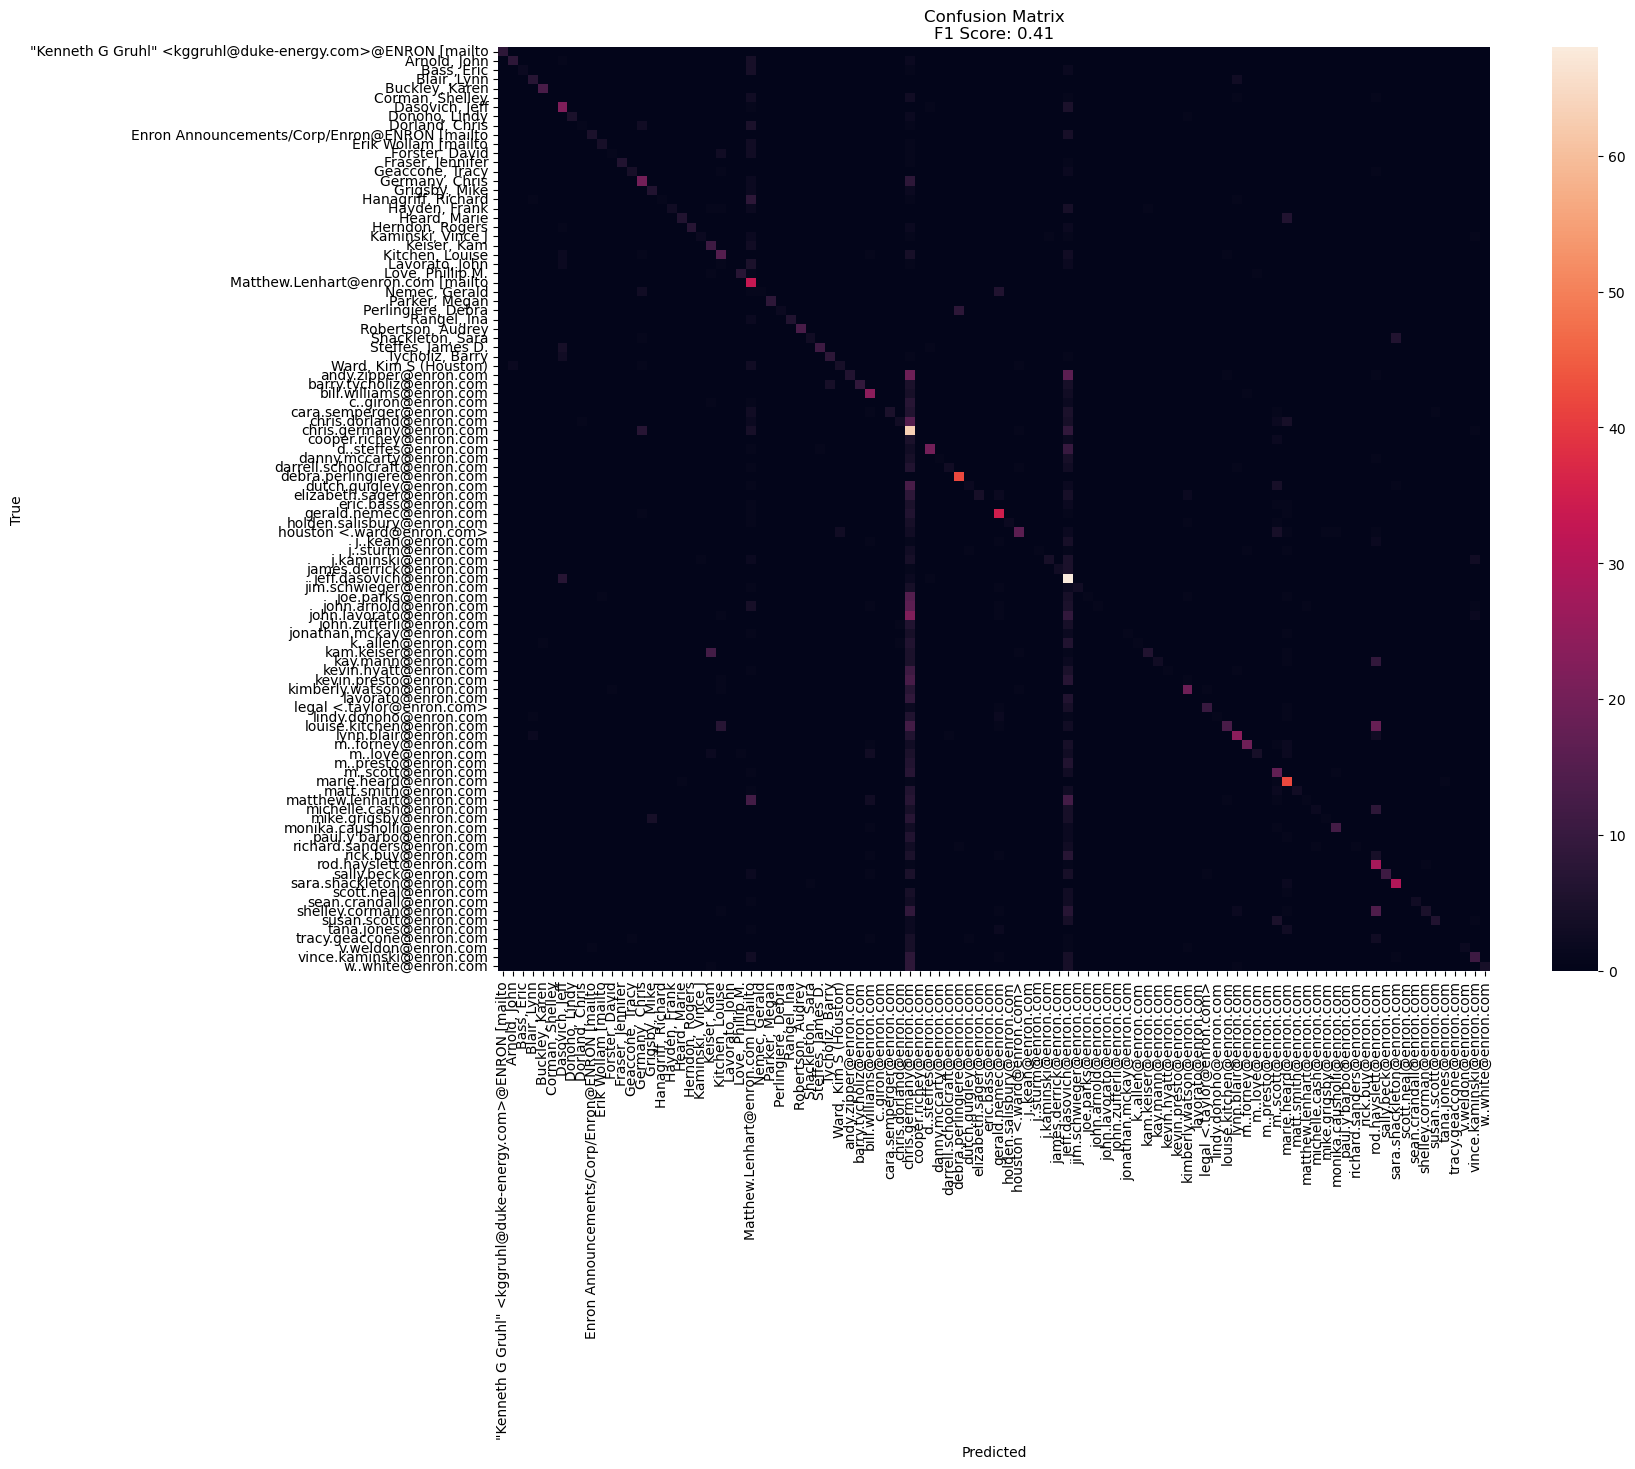

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load and preprocess the data
emails_df = pd.read_csv('../generated_csv_files/top_100_senders_output.csv')  # Update with the correct file path
emails_df.rename(columns={'from_': 'from'}, inplace=True)
emails_df = emails_df.dropna()

# Encode the labels
label_encoder = LabelEncoder()
emails_df['label_encoded'] = label_encoder.fit_transform(emails_df['from'])

# Split the data into train, test, and validation sets
train_df, temp_df = train_test_split(emails_df, test_size=0.3, random_state=42, stratify=emails_df['label_encoded'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label_encoded'])

Y_train = train_df['label_encoded'].values
Y_test = test_df['label_encoded'].values
Y_val = val_df['label_encoded'].values

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=Y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=3500)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['body'])
X_val_tfidf = tfidf_vectorizer.transform(val_df['body'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['body'])

# Naive Bayes Model with adjusted feature counts
nb_model = MultinomialNB()
X_train_weighted = X_train_tfidf.toarray() * np.vectorize(class_weights_dict.get)(Y_train)[:, None]
nb_model.fit(X_train_weighted, Y_train)

# Training Accuracy
y_train_pred = nb_model.predict(X_train_weighted)
train_accuracy = accuracy_score(Y_train, y_train_pred)
print(f'Naive Bayes Train Accuracy: {train_accuracy}')

# Training F1 Score
train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
print(f'Training F1 Score: {train_f1}')

# Validation Accuracy and F1 Score
y_val_pred = nb_model.predict(X_val_tfidf)
val_accuracy = accuracy_score(Y_val, y_val_pred)
val_f1 = f1_score(Y_val, y_val_pred, average='weighted')
print(f'Naive Bayes Validation Accuracy: {val_accuracy}')
print(f'Validation F1 Score: {val_f1}')

# Evaluation on Test Data
y_test_pred = nb_model.predict(X_test_tfidf)

# Test Accuracy
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f'Naive Bayes Test Accuracy: {test_accuracy}')

# Test F1 Score
test_f1 = f1_score(Y_test, y_test_pred, average='weighted')
print(f'Test F1 Score: {test_f1}')

# Classification Report
print(classification_report(Y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_test_pred)
plt.figure(figsize=(16, 12))
sns.heatmap(cm, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nF1 Score: {test_f1:.2f}')
plt.show()


Code without handling class imbalance:

Naive Bayes Train Accuracy: 0.3316593886462882
Training F1 Score: 0.3017473996368481
Naive Bayes Test Accuracy: 0.2790224032586558
Test F1 Score: 0.2383269588605987
                                                           precision    recall  f1-score   support

"Kenneth G Gruhl" <kggruhl@duke-energy.com>@ENRON [mailto       1.00      0.12      0.22         8
                                             Arnold, John       0.00      0.00      0.00        15
                                               Bass, Eric       0.00      0.00      0.00         9
                                              Blair, Lynn       0.00      0.00      0.00        10
                                           Buckley, Karen       1.00      0.15      0.27        13
                                          Corman, Shelley       0.00      0.00      0.00         9
                                           Dasovich, Jeff       1.00      0.07      0.13        29
                                          

/Users/chathuni/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chathuni/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chathuni/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


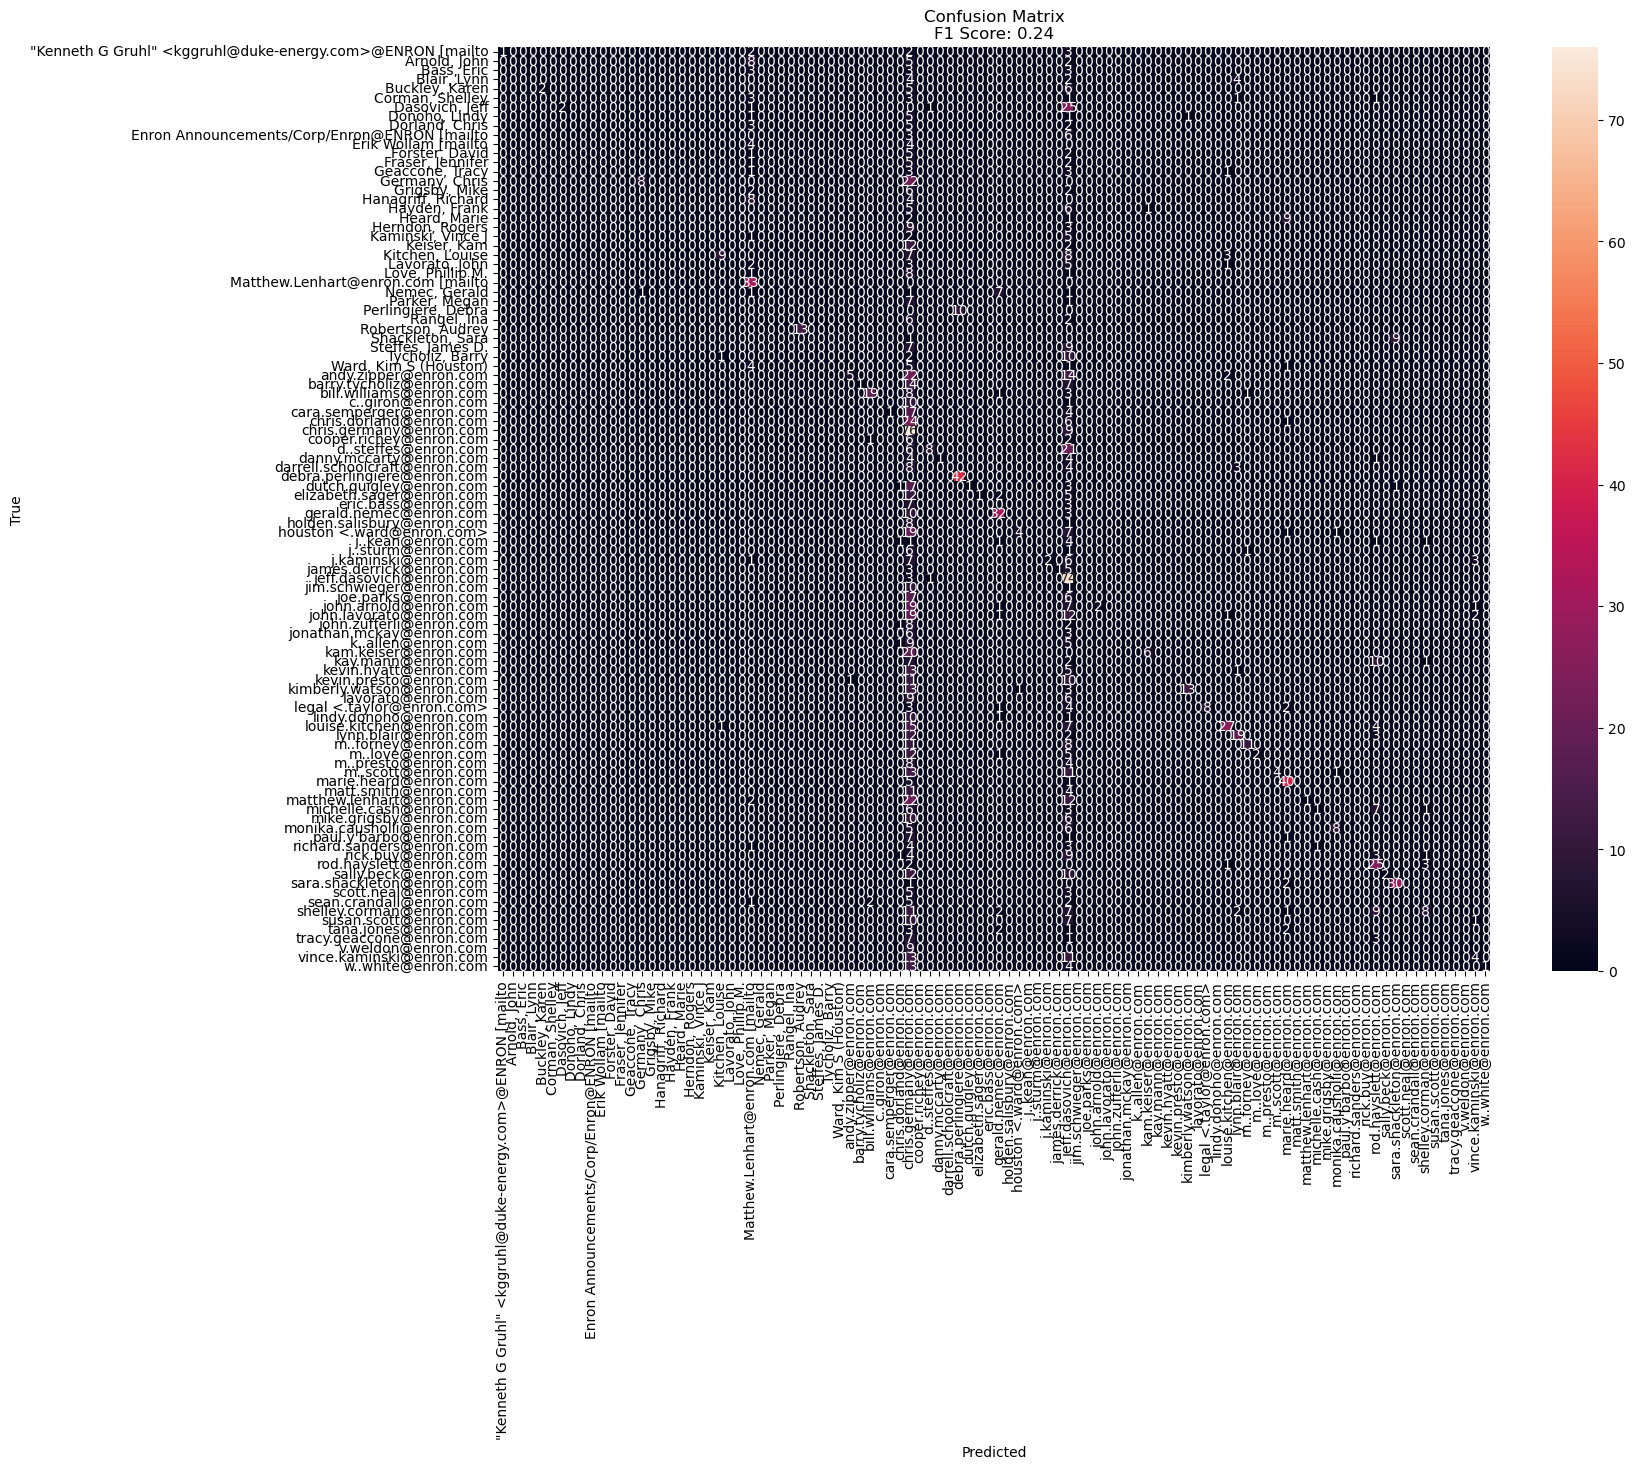

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
emails_df = pd.read_csv('top_100_senders_output.csv')  # Update with the correct file path
emails_df.rename(columns={'from_': 'from'}, inplace=True)
emails_df = emails_df.dropna()

# Encode the labels
label_encoder = LabelEncoder()
emails_df['label_encoded'] = label_encoder.fit_transform(emails_df['from'])

# Split the data into train, test, and validation sets
train_df, temp_df = train_test_split(emails_df, test_size=0.3, random_state=42, stratify=emails_df['label_encoded'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label_encoded'])

Y_train = train_df['label_encoded'].values
Y_test = test_df['label_encoded'].values
Y_val = val_df['label_encoded'].values

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['body'])
X_val_tfidf = tfidf_vectorizer.transform(val_df['body'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['body'])

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train)

# Training Accuracy
y_train_pred = nb_model.predict(X_train_tfidf)
train_accuracy = accuracy_score(Y_train, y_train_pred)
print(f'Naive Bayes Train Accuracy: {train_accuracy}')

# Training F1 Score
train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
print(f'Training F1 Score: {train_f1}')

# Evaluation on Test Data
y_test_pred = nb_model.predict(X_test_tfidf)

# Test Accuracy
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f'Naive Bayes Test Accuracy: {test_accuracy}')

# Test F1 Score
test_f1 = f1_score(Y_test, y_test_pred, average='weighted')
print(f'Test F1 Score: {test_f1}')

# Classification Report
print(classification_report(Y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_test_pred)
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nF1 Score: {test_f1:.2f}')
plt.show()